In [1]:
!pwd

/content


In [2]:
cd /content/drive/MyDrive/ML-for-ButtonBand

/content/drive/MyDrive/ML-for-ButtonBand


In [3]:
# MIT License

# Copyright (c) 2019 Valerio Velardo

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Modified by Yang Changeun, 2023.

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [4]:
# Display Waveform
FIG_SIZE = (15, 10)
file = 'Data/xi - Blue Zenith.mp3'

signal, sample_rate = librosa.load(file, sr = 20000)
print('signal shape : ', signal.shape)
print('length : ', signal.shape[0]/float(sample_rate), 'secs')

signal shape :  (5200980,)
length :  260.049 secs


Text(0.5, 1.0, 'Waveform')

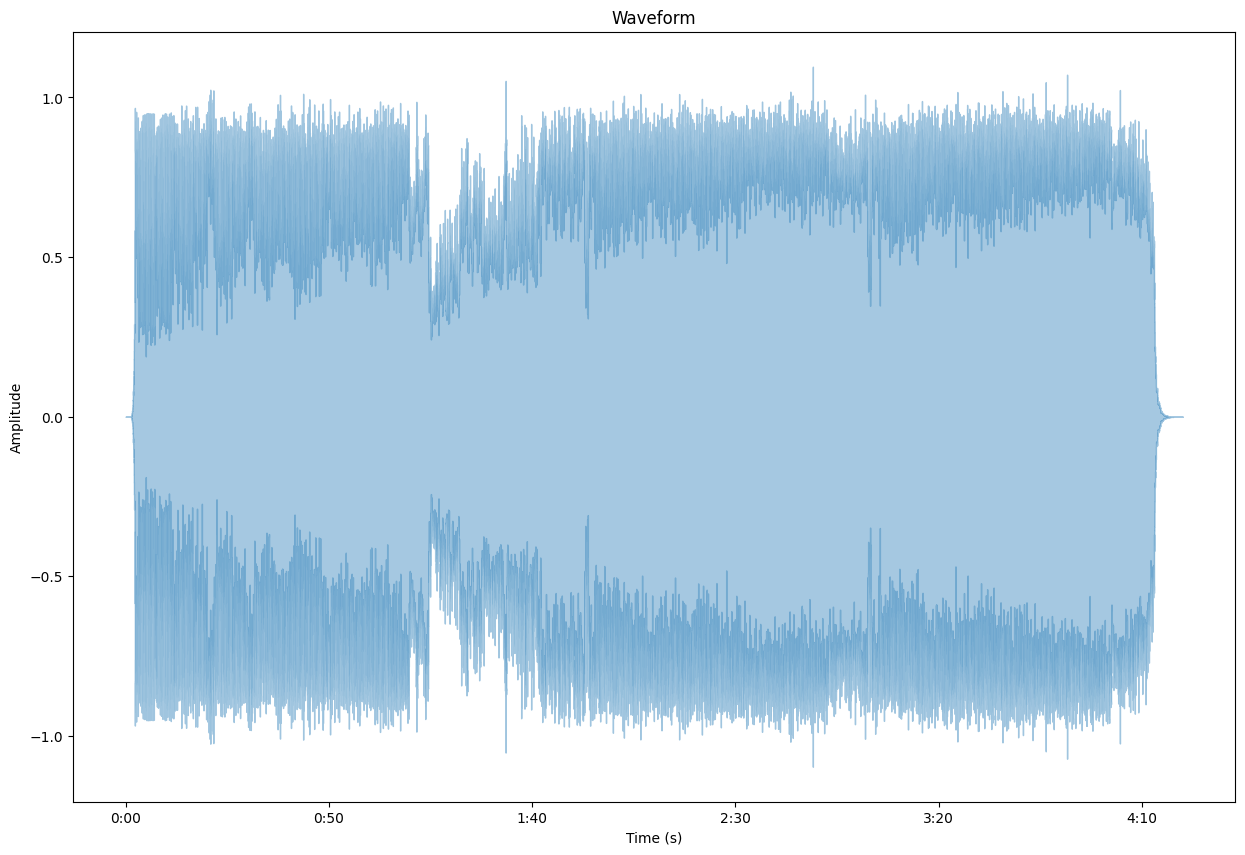

In [5]:
plt.figure(figsize = FIG_SIZE)
librosa.display.waveshow(signal, sr = sample_rate, alpha = 0.4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

In [6]:
# FFT -> power spectrum
fft = np.fft.fft(signal)
spectrum = np.abs(fft)
f = np.linspace(0, sample_rate, len(spectrum))
left_spectrum = spectrum[ : int(len(spectrum) / 2)]
left_f = f[ : int(len(spectrum) / 2)]

print('fft shape : ', fft.shape)
print('spectrum shape : ', spectrum.shape)
print('f shape : ', f.shape)
print('left_spectrum shape : ', left_spectrum.shape)
print('left_f shape : ', left_f.shape)

fft shape :  (5200980,)
spectrum shape :  (5200980,)
f shape :  (5200980,)
left_spectrum shape :  (2600490,)
left_f shape :  (2600490,)


Text(0.5, 1.0, 'Power spectrum')

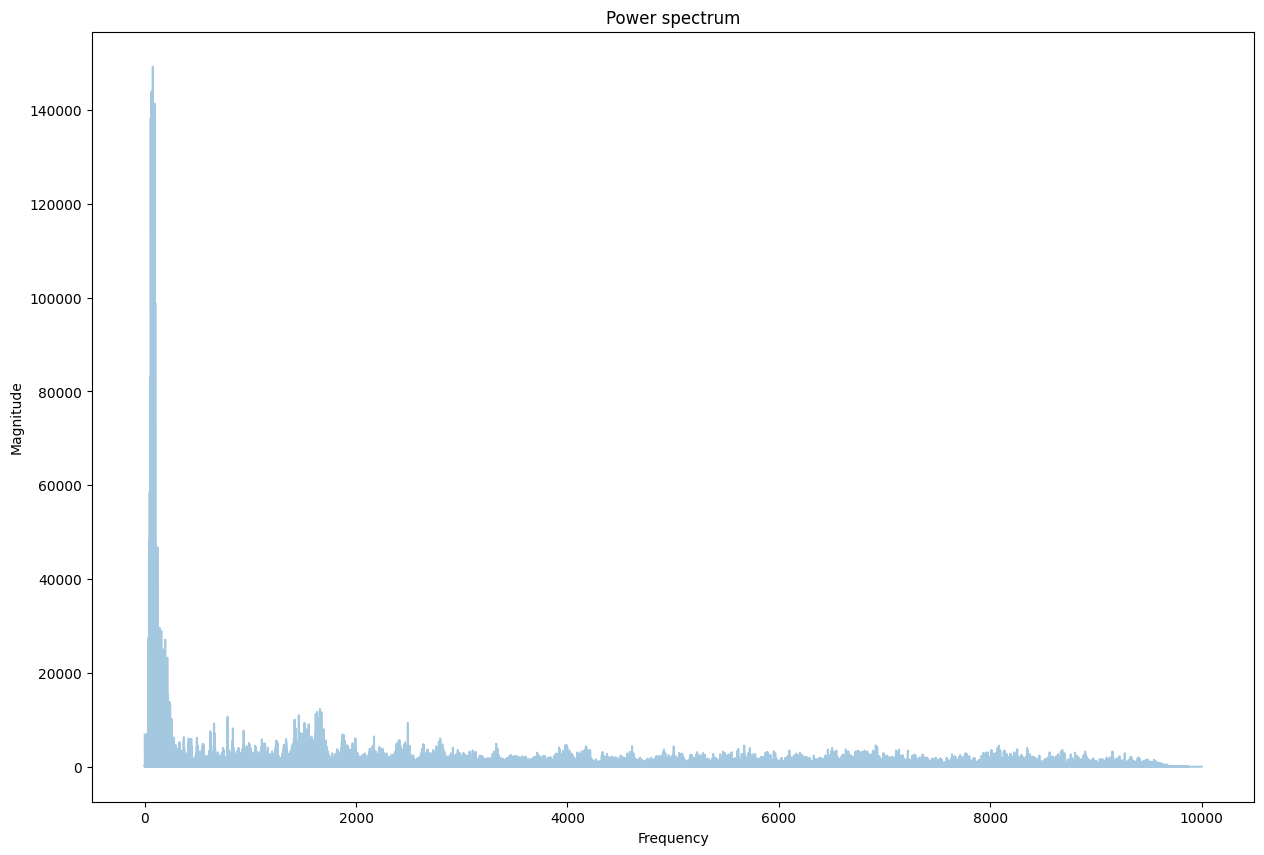

In [7]:
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha = 0.4)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')

In [8]:
# STFT -> spectrogram
hop_length = 1500 # in num. of samples
n_fft = 6000 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length) / sample_rate
n_fft_duration = float(n_fft) / sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))
print("STFT window duration is : {}s".format(n_fft_duration))

STFT hop length duration is : 0.075s
STFT window duration is : 0.3s


In [9]:
# perform stft
stft = librosa.stft(signal, n_fft = n_fft, hop_length = hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

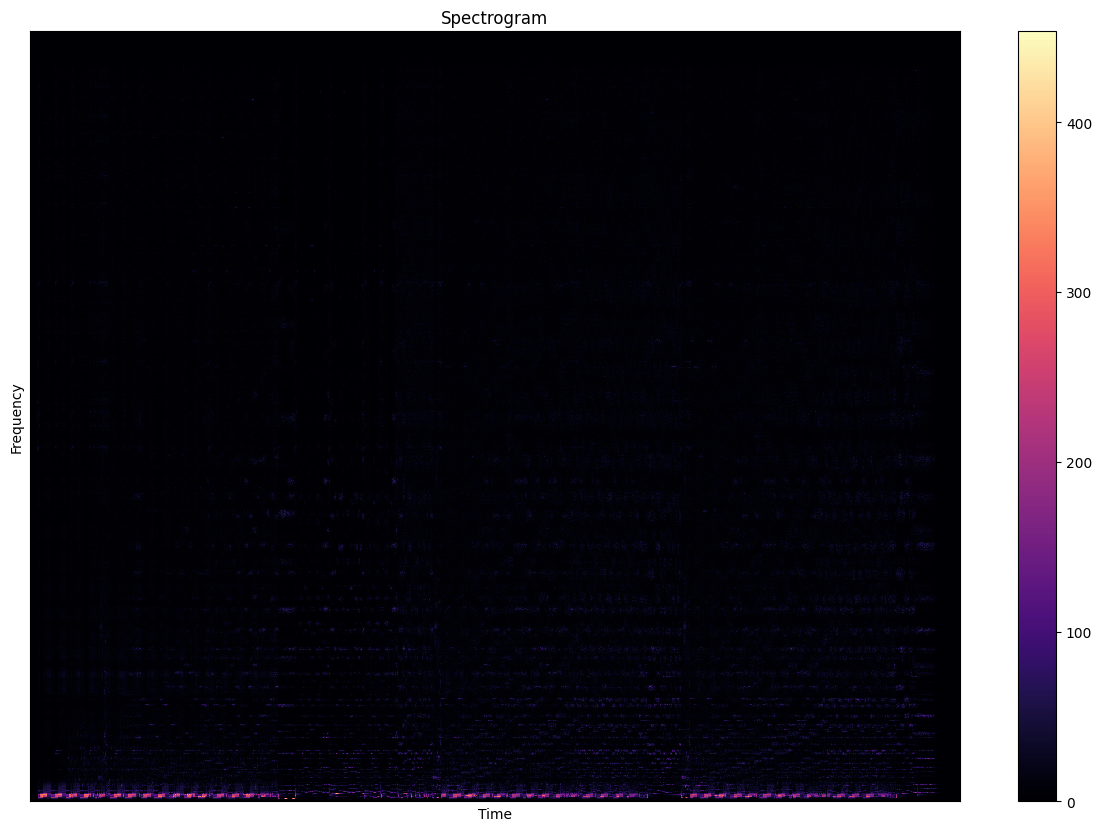

In [10]:
# display spectrogram
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram')

In [11]:
# Cast Amplitude to Decibels (apply logarithm)
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format = '%+2.0f dB')
plt.title('Spectrogram (dB)')

Output hidden; open in https://colab.research.google.com to view.

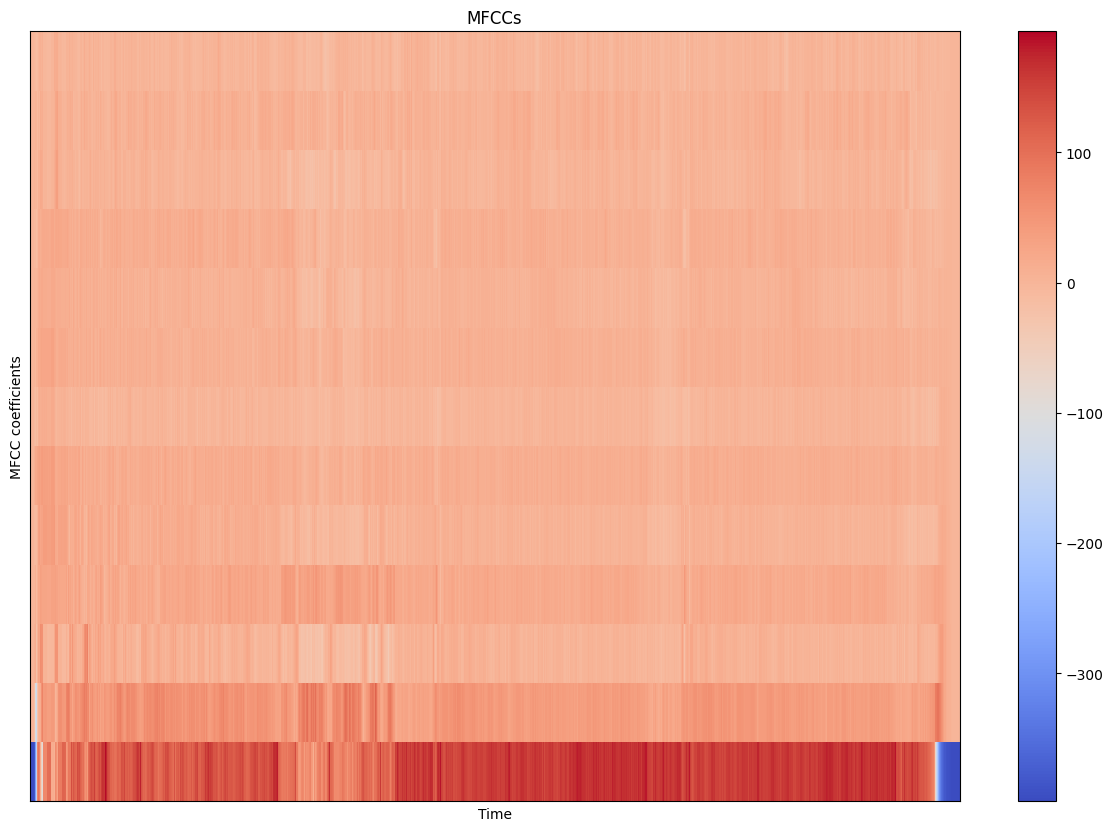

In [12]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y = signal, sr = sample_rate, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

# display MFCCs
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(MFCCs, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.colorbar()
plt.title('MFCCs')

# show plots
plt.show()